# WeatherPy
----

### Analysis
* Max temperatures of cities 60 degrees north of the equator are much colder than those 60 degrees south of the equator (in December)
* Winds speeds aren't an indicator of of warmth towards the equator however in December, majority of cities fall in the 20mph or lower wind speed
* There is no correlation between cloudiness and latitude as it pertains to our analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Build the URL = url + appid= + api_key + &q= + city + units (imperial = F, metric = C, Kelvins is the default)
#https://openweathermap.org/current
#Used this cell to see JSON structure so I can extract appropriate data 
url = "http://api.openweathermap.org/data/2.5/weather?"
appid = "APPID="
q = "&q="
#city = "new norfolk"
units = "&units="
unit = "imperial"
#query_url = url + appid + api_key + units + unit + q + city
#asdf = requests.get(query_url).json()
#print(asdf['name'])
#pprint(requests.get(query_url).json())

In [4]:
#Create an empty list that will only capture cities with weather data 
use_cities = []

print("Beginning Data Retrieval")
print("-----------------------------")
i = 0
set_num = 1
for city in cities:
    try:
        i = i+1  
        if i > 50:
            i = 0
            set_num = set_num + 1
        if set_num > 1:
            if i > 49:
                i = 0
                set_num = set_num + 1
        loop_url = url + appid + api_key + units + unit + q
        weather_data = requests.get(loop_url + city).json()
        test_cities = weather_data["name"]
        print(f"Processing Record {i} of Set {set_num} | {city}")
        use_cities.append(city)
    except:
        print("City not found. Skipping...")
        i = i-1
    time.sleep(1.1)

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | egvekinot
Processing Record 5 of Set 1 | torbay
City not found. Skipping...
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | marquard
Processing Record 10 of Set 1 | passo de camaragibe
Processing Record 11 of Set 1 | fukue
City not found. Skipping...
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | fort nelson
City not found. Skipping...
Processing Record 14 of Set 1 | hay river
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | nizhniy mamon
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | klaksvik
Processing Record 20 of Set 1 | jamestown
City not found. Skipping

Processing Record 32 of Set 4 | okha
Processing Record 33 of Set 4 | pyapon
City not found. Skipping...
City not found. Skipping...
Processing Record 34 of Set 4 | sacama
Processing Record 35 of Set 4 | beloha
Processing Record 36 of Set 4 | moramanga
Processing Record 37 of Set 4 | pitimbu
Processing Record 38 of Set 4 | sorland
Processing Record 39 of Set 4 | tura
Processing Record 40 of Set 4 | dusetos
Processing Record 41 of Set 4 | port-cartier
Processing Record 42 of Set 4 | pevek
Processing Record 43 of Set 4 | ust-kulom
Processing Record 44 of Set 4 | hami
Processing Record 45 of Set 4 | ishinomaki
Processing Record 46 of Set 4 | george
City not found. Skipping...
Processing Record 47 of Set 4 | oranjemund
Processing Record 48 of Set 4 | acapulco
Processing Record 49 of Set 4 | byron bay
Processing Record 0 of Set 5 | meulaboh
Processing Record 1 of Set 5 | hofn
City not found. Skipping...
Processing Record 2 of Set 5 | kavaratti
Processing Record 3 of Set 5 | srednekolymsk
Pro

Processing Record 17 of Set 8 | yushan
Processing Record 18 of Set 8 | nouadhibou
City not found. Skipping...
Processing Record 19 of Set 8 | nhulunbuy
Processing Record 20 of Set 8 | nieves
Processing Record 21 of Set 8 | athabasca
City not found. Skipping...
Processing Record 22 of Set 8 | alibunar
Processing Record 23 of Set 8 | moerai
Processing Record 24 of Set 8 | avtury
Processing Record 25 of Set 8 | pavlohrad
Processing Record 26 of Set 8 | peniche
Processing Record 27 of Set 8 | saldanha
City not found. Skipping...
Processing Record 28 of Set 8 | shankargarh
City not found. Skipping...
Processing Record 29 of Set 8 | ampanihy
Processing Record 30 of Set 8 | sundsvall
Processing Record 31 of Set 8 | ornskoldsvik
Processing Record 32 of Set 8 | ossora
Processing Record 33 of Set 8 | lubao
Processing Record 34 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 35 of Set 8 | sumenep
Processing Record 36 of Set 8 | manturovo
City not found. Skipping...
Processing Record 37 of 

In [5]:
#Create empty list that will be filled once the loop is processed
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Loop through the API to create the list for the DataFrame
for city in use_cities:
    loop_url = url + appid + api_key + units + unit + q
    weather_data = requests.get(loop_url + city).json()
    #Create list for: Cloudiness, Country, Date, Humidity, Latitude, Longitude, Max Temperature (F), & Wind Speed
    Cloudiness.append(weather_data["clouds"]["all"])
    Country.append(weather_data["sys"]["country"])
    Date.append(weather_data["dt"])
    Humidity.append(weather_data["main"]["humidity"])
    Lat.append(weather_data['coord']['lat'])
    Lng.append(weather_data['coord']['lon'])
    Max_Temp.append(weather_data["main"]["temp_max"])
    Wind_Speed.append(weather_data["wind"]["speed"])
    #Take a 1.1 second break before sending another request to the API
    time.sleep(1.1)

#Create DF
weather_df = pd.DataFrame({
    "City": use_cities,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
})

#Export DF to a CSV
weather_df.to_csv("WeatherPy.csv", index = False, header = True)

In [7]:
#Display Column headers and the row count
weather_df.count()

City          537
Cloudiness    537
Country       537
Date          537
Humidity      537
Lat           537
Lng           537
Max Temp      537
Wind Speed    537
dtype: int64

In [8]:
#Top 5 rows of DF
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mahebourg,20,MU,1545775200,94,-20.41,57.70,75.20,3.36
1,albany,1,US,1545775020,43,42.65,-73.75,32.00,6.93
2,kapaa,20,US,1545775500,74,22.08,-159.32,80.06,12.75
3,egvekinot,44,RU,1545776482,31,66.32,-179.17,-22.37,3.04
4,torbay,90,CA,1545771600,86,47.66,-52.73,26.60,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
#Get todays date so chart titles dynamically display the date in which the code is ran and the weather data represents
import datetime
today = datetime.date.today()  
year = today.year
month = today.month
day = today.day
date = f"{month}/{day}/{year}"

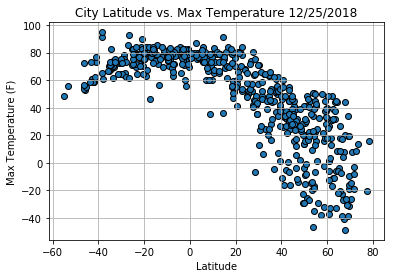

In [10]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.savefig(f"City Latitude vs. Max Temperature {date.replace('/','.')}.png")
plt.show()

#### Latitude vs. Humidity Plot

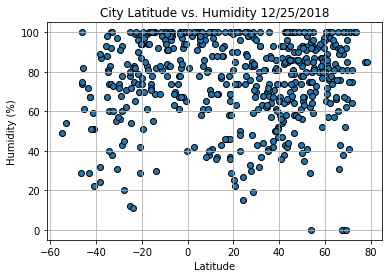

In [11]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"], edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {date}")
plt.savefig(f"City Latitude vs. Humidity {date.replace('/','.')}.png")
plt.show()

#### Latitude vs. Cloudiness Plot

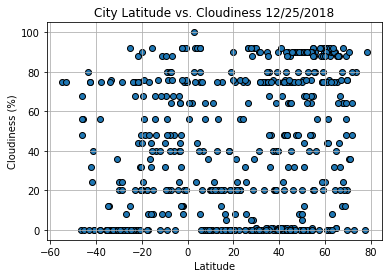

In [12]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.savefig(f"City Latitude vs. Cloudiness {date.replace('/','.')}.png")
plt.show()

#### Latitude vs. Wind Speed Plot

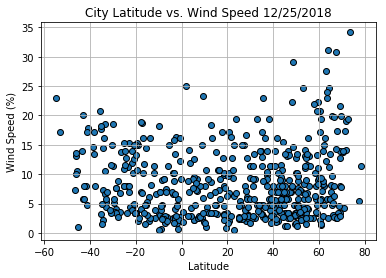

In [13]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.savefig(f"City Latitude vs. Wind Speed {date.replace('/','.')}.png")
plt.show()